In [1]:
# dataset from https://www.kaggle.com/datasets/arthurboari/taylor-swift-spotify-data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Taylor Swift Spotify Data 07-23.csv')

In [2]:
df.head()

,artist_name,artist_id,album_id,album_type,album_release_date,album_release_year,album_release_date_precision,danceability,energy,key,...,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
0,Taylor Swift,06HL4z0CvFAxyc27GXpf02,5AEDGbliTTfjOB8TSm1sxt,album,2023-07-07,2023,day,0.646,0.783,7,...,Mine (Taylor's Version),NaN,1,track,spotify:track:7G0gBu6nLdhFDPRLc0HdDG,https://open.spotify.com/track/7G0gBu6nLdhFDPR...,Speak Now (Taylor's Version),G,major,G major
1,Taylor Swift,06HL4z0CvFAxyc27GXpf02,5AEDGbliTTfjOB8TSm1sxt,album,2023-07-07,2023,day,0.588,0.758,5,...,Sparks Fly (Taylor’s Version),NaN,2,track,spotify:track:3MytWN8L7shNYzGl4tAKRp,https://open.spotify.com/track/3MytWN8L7shNYzG...,Speak Now (Taylor's Version),F,major,F major
2,Taylor Swift,06HL4z0CvFAxyc27GXpf02,5AEDGbliTTfjOB8TSm1sxt,album,2023-07-07,2023,day,0.497,0.635,2,...,Back To December (Taylor's Version),NaN,3,track,spotify:track:79uDOz0zuuWS7HWxzMmTa2,https://open.spotify.com/track/79uDOz0zuuWS7HW...,Speak Now (Taylor's Version),D,major,D major
3,Taylor Swift,06HL4z0CvFAxyc27GXpf02,5AEDGbliTTfjOB8TSm1sxt,album,2023-07-07,2023,day,0.727,0.677,7,...,Speak Now (Taylor's Version),NaN,4,track,spotify:track:5xXqyjLicvEpch72qEryFT,https://open.spotify.com/track/5xXqyjLicvEpch7...,Speak Now (Taylor's Version),G,major,G major
4,Taylor Swift,06HL4z0CvFAxyc27GXpf02,5AEDGbliTTfjOB8TSm1sxt,album,2023-07-07,2023,day,0.419,0.470,4,...,Dear John (Taylor's Version),NaN,5,track,spotify:track:1zU8j1x3yi9xalMF96pzKp,https://open.spotify.com/track/1zU8j1x3yi9xalM...,Speak Now (Taylor's Version),E,major,E major


In [3]:
df.groupby(['album_name']).size()

album_name
1989                                                                                   13
1989 (Deluxe)                                                                          19
Fearless (International Version)                                                       16
Fearless (Platinum Edition)                                                            19
Fearless (Taylor's Version)                                                            26
Live From Clear Channel Stripped 2008                                                   8
Lover                                                                                  18
Midnights                                                                              13
Midnights (3am Edition)                                                                20
Midnights (The Til Dawn Edition)                                                       23
Red (Deluxe Edition)                                                                   22

In [4]:
df_small=df.drop(['type','track_href','artist_id', 'album_id', 'album_release_date_precision','track_preview_url', 'track_uri', 'external_urls.spotify'], axis=1)

# filter the rows that contain the substring, this is to remove entries which aren't original albums but special renditions and such
substring = ['Deluxe','Disney','Edition', 'Live','Stadium','delux','International']
pattern = '|'.join(substring)

filter = df_small['album_name'].str.contains(pattern) 
filtered_df = df_small[~filter]

filtered_df['album_name'].unique()

array(["Speak Now (Taylor's Version)", 'Midnights',
       "Red (Taylor's Version)", "Fearless (Taylor's Version)",
       'evermore', 'folklore', 'Lover', 'reputation', '1989', 'Speak Now',
       'Taylor Swift'], dtype=object)

In [5]:
filtered_df=filtered_df.drop_duplicates(subset='track_name')
filtered_df.head()

,artist_name,album_type,album_release_date,album_release_year,danceability,energy,key,loudness,mode,speechiness,...,disc_number,duration_ms,explicit,is_local,track_name,track_number,album_name,key_name,mode_name,key_mode
0,Taylor Swift,album,2023-07-07,2023,0.646,0.783,7,-2.846,1,0.0356,...,1,231706,False,False,Mine (Taylor's Version),1,Speak Now (Taylor's Version),G,major,G major
1,Taylor Swift,album,2023-07-07,2023,0.588,0.758,5,-2.347,1,0.0305,...,1,261230,False,False,Sparks Fly (Taylor’s Version),2,Speak Now (Taylor's Version),F,major,F major
2,Taylor Swift,album,2023-07-07,2023,0.497,0.635,2,-3.927,1,0.0273,...,1,294189,False,False,Back To December (Taylor's Version),3,Speak Now (Taylor's Version),D,major,D major
3,Taylor Swift,album,2023-07-07,2023,0.727,0.677,7,-2.871,1,0.0325,...,1,242473,False,False,Speak Now (Taylor's Version),4,Speak Now (Taylor's Version),G,major,G major
4,Taylor Swift,album,2023-07-07,2023,0.419,0.470,4,-5.016,1,0.0296,...,1,405906,False,False,Dear John (Taylor's Version),5,Speak Now (Taylor's Version),E,major,E major


In [6]:
print(filtered_df['album_name'].unique())
print(filtered_df.groupby(['album_name'])['duration_ms'].sum().keys())


["Speak Now (Taylor's Version)" 'Midnights' "Red (Taylor's Version)"
 "Fearless (Taylor's Version)" 'evermore' 'folklore' 'Lover' 'reputation'
 '1989' 'Speak Now' 'Taylor Swift']
Index(['1989', 'Fearless (Taylor's Version)', 'Lover', 'Midnights',
       'Red (Taylor's Version)', 'Speak Now', 'Speak Now (Taylor's Version)',
       'Taylor Swift', 'evermore', 'folklore', 'reputation'],
      dtype='object', name='album_name')


In [10]:
# filtered_df['album_name'].unique() and filtered_df.groupby(['album_name'])['speechiness'].min().keys() does not have the same ordering
#filtered_df['album_name'].unique() preserves order of appearence 
# filtered_df.groupby(['album_name'])['speechiness'].min().keys() is ordered like the rest of the functions used here
album_summary=pd.DataFrame()
album_summary['album']=filtered_df.groupby(['album_name'])['speechiness'].min().keys()
album_summary['size']=list(filtered_df.groupby(['album_name']).size())
album_summary['speechiness_min']=list(filtered_df.groupby(['album_name'])['speechiness'].min())
album_summary['speechiness_max']=list(filtered_df.groupby(['album_name'])['speechiness'].max())
album_summary['loudness_min']=list(filtered_df.groupby(['album_name'])['loudness'].min())
album_summary['loudness_max']=list(filtered_df.groupby(['album_name'])['loudness'].max())
album_summary['total_duration_ms']=list(filtered_df.groupby(['album_name'])['duration_ms'].sum())
album_summary['total_duration_HMS'] = pd.to_datetime(album_summary['total_duration_ms'], unit='ms').dt.strftime('%H:%M:%S:%f').str[:-3] 
album_summary

,album,size,speechiness_min,speechiness_max,loudness_min,loudness_max,total_duration_ms,total_duration_HMS
0,1989,13,0.0324,0.1810,-8.768,-4.807,2927864,00:48:47:864
1,Fearless (Taylor's Version),26,0.0263,0.0628,-11.548,-3.669,6392490,01:46:32:490
2,Lover,18,0.0344,0.5190,-12.566,-4.105,3711381,01:01:51:381
3,Midnights,13,0.0375,0.3900,-15.480,-6.571,2648338,00:44:08:338
4,Red (Taylor's Version),30,0.0250,0.1750,-13.778,-4.516,7839830,02:10:39:830
5,Speak Now,14,0.0258,0.0887,-9.531,-2.641,4021982,01:07:01:982
6,Speak Now (Taylor's Version),22,0.0265,0.0803,-8.460,-1.909,6284051,01:44:44:051
7,Taylor Swift,15,0.0231,0.0646,-6.941,-2.098,3209567,00:53:29:567
8,evermore,15,0.0264,0.2450,-12.077,-7.589,3645210,01:00:45:210
9,folklore,16,0.0253,0.0916,-15.065,-6.942,3816587,01:03:36:587


<Axes: >

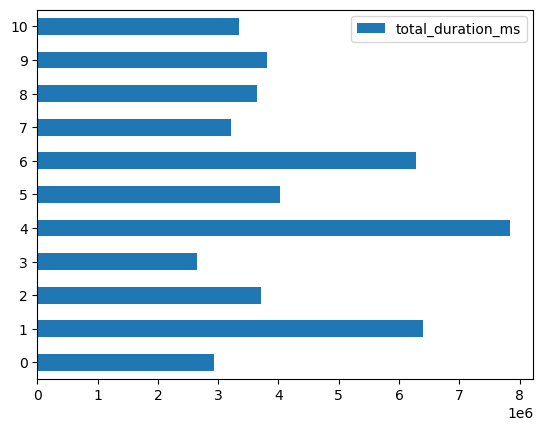

In [28]:
temp_df=pd.DataFrame()
temp_df['album']=album_summary['album'].astype(str)
temp_df['total_duration_ms']=album_summary['total_duration_ms']
#temp_df.plot.barh(y='album', x='total_duration_ms')
temp_df.plot.barh()

<Axes: >

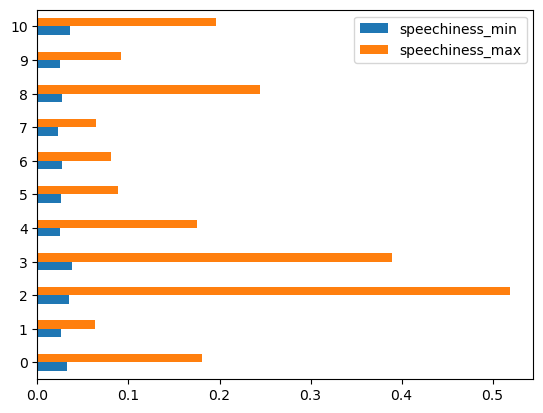

In [31]:
temp_df=pd.DataFrame()
temp_df['speechiness_min']=album_summary['speechiness_min']
temp_df['speechiness_max']=album_summary['speechiness_max']
temp_df.plot.barh()

/var/folders/zf/vn2shr2j6x9_qkg68dw_nk4c0000gn/T/ipykernel_96241/2150724051.py:8: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  xcol = filtered_df.groupby(['album_name']).get_group(x)['danceability']
/var/folders/zf/vn2shr2j6x9_qkg68dw_nk4c0000gn/T/ipykernel_96241/2150724051.py:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  ycol = filtered_df.groupby(['album_name']).get_group(x)['energy']
/var/folders/zf/vn2shr2j6x9_qkg68dw_nk4c0000gn/T/ipykernel_96241/2150724051.py:8: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  xcol = filtered_df.

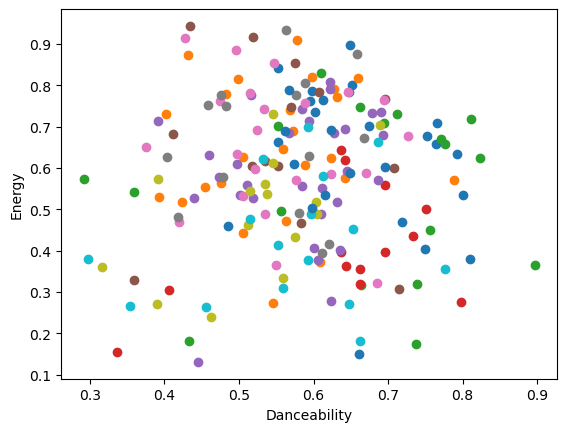

In [65]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
temp_df=pd.DataFrame()

for x in filtered_df.groupby(['album_name']).groups:
    xcol = filtered_df.groupby(['album_name']).get_group(x)['danceability']
    ycol = filtered_df.groupby(['album_name']).get_group(x)['energy']
    ax.scatter(xcol, ycol)
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
plt.show()